In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm  
from statsmodels.formula.api import ols  

In [2]:
data = pd.read_csv(r"D:\dataset\insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['smoker'], data['region'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(contingency_table)
print("Statictics:", chi2_stat)
print("p-value:", p_value)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58
Statictics: 7.34347776140707
p-value: 0.06171954839170547


In [4]:
data.replace({
    'sex': {'male': 1, 'female': 0},
    'smoker': {'yes': 1, 'no': 0},
    'region': {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
}, inplace=True)

<AxesSubplot:>

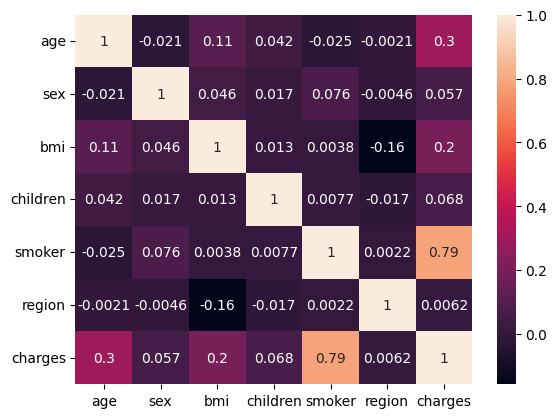

In [5]:
correlation = data.corr()
sns.heatmap(correlation,annot=True)

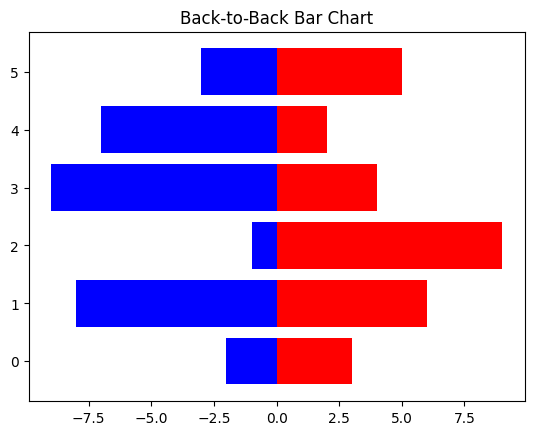

In [6]:


# create data
A = np.array([3,6,9,4,2,5])
B = np.array([2,8,1,9,7,3])
X = np.arange(6)

# plot the bars
plt.barh(X, A, color = 'r')
plt.barh(X, -B, color = 'b')
plt.title("Back-to-Back Bar Chart")
plt.show()


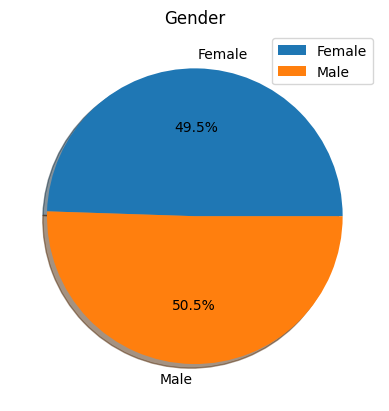

In [7]:
Female=data['sex'].value_counts()[0]
Male=data['sex'].value_counts()[1]
X=[Female,Male]
Y=['Female','Male']
plt.pie(X,labels=Y,autopct='%1.1f%%',shadow=True)
plt.title("Gender")
plt.legend()
plt.show()

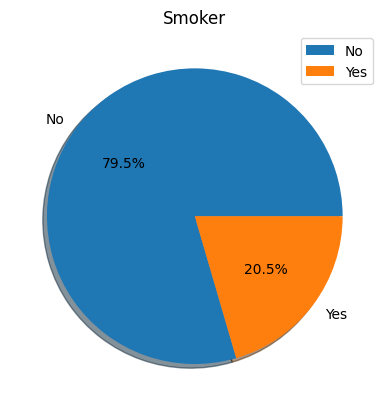

In [8]:
No=data['smoker'].value_counts()[0]
Yes=data['smoker'].value_counts()[1]
X=[No,Yes]
Y=['No','Yes']
plt.pie(X,labels=Y,autopct='%1.1f%%',shadow=True)
plt.title("Smoker")
plt.legend()
plt.show()

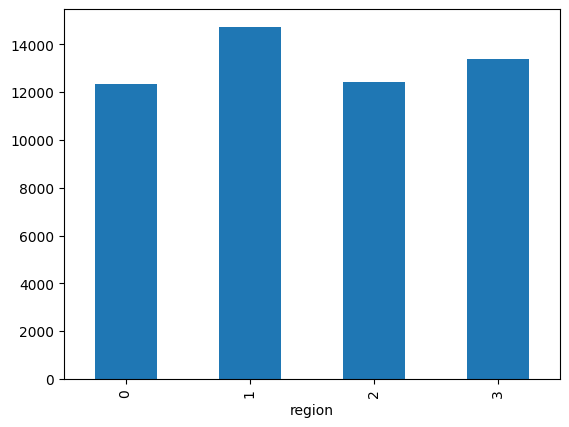

In [9]:
data.groupby(data['region']).mean()['charges'].plot.bar()
plt.show()

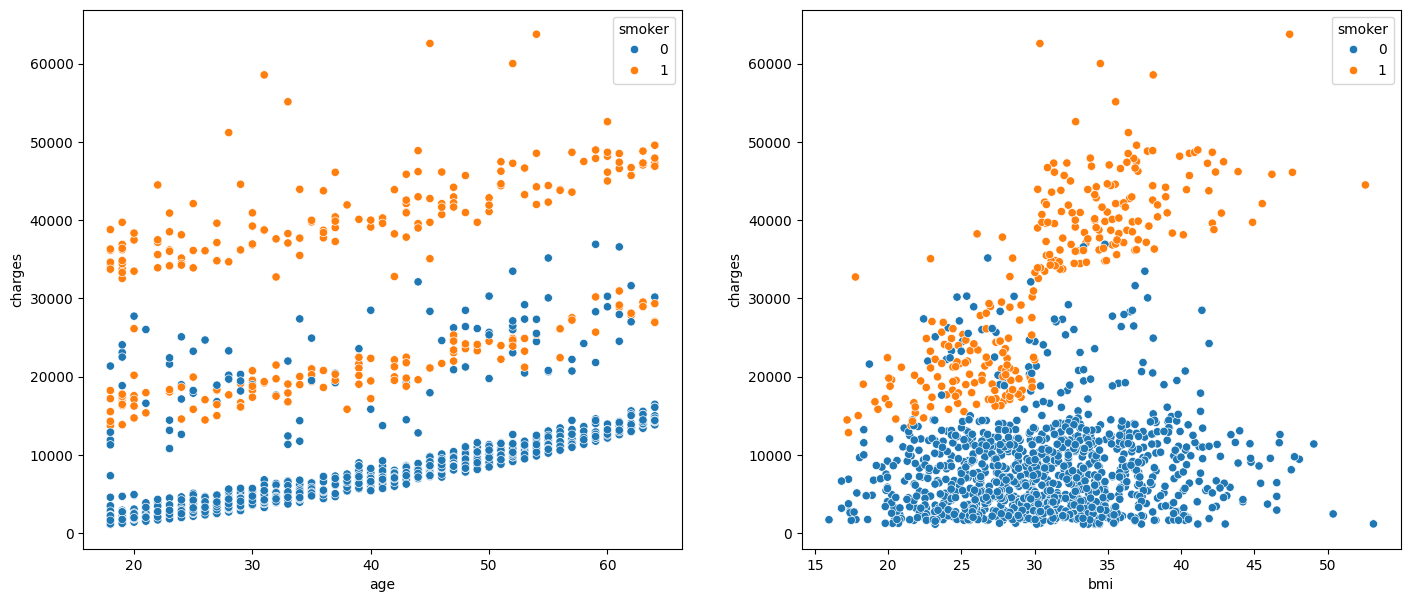

In [10]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=data, x=col,
                y='charges',
                hue='smoker')
plt.show()


In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


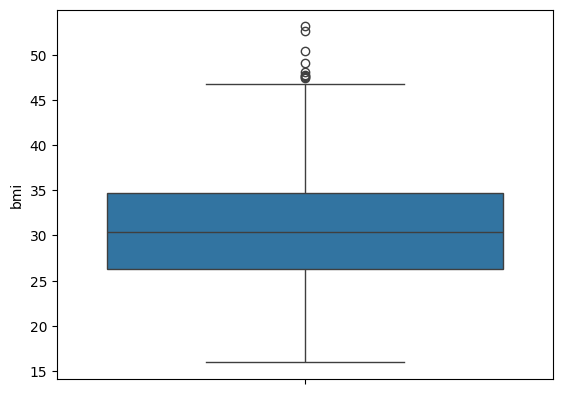

In [12]:
sns.boxplot(data['bmi'])
plt.show()

In [13]:
Q1=data['bmi'].quantile(0.25)
Q2=data['bmi'].quantile(0.5)
Q3=data['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


13.7
47.290000000000006


In [18]:
# from feature_engine.outliers import ArbitraryOutlierCapper
# arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.7},max_capping_dict={'bmi':47.29})
# data[['bmi']]=arb.fit_transform(data[['bmi']])
# sns.boxplot(data['bmi'])
# plt.show()

In [19]:
X = data.drop(['charges'], axis = 1)
y = data['charges']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear regression

In [21]:
li = LinearRegression()
li.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = li.predict(X_test)
y_train_pred = li.predict(X_train)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test,y_pred)
cv_lr = cross_val_score(li,X,y,cv=5,).mean()
print("R2 Train Score:", r2_lr_train)
print("R2 Test Score:", r2_lr_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print(cv_lr)

R2 Train Score: 0.7541231327010269
R2 Test Score: 0.7312864771750183
MSE: 33402611.06095958
0.7472559473580954


# Polynomial Regression

In [23]:
poly_reg = PolynomialFeatures(degree = 3)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

LinearRegression()

In [38]:
y_pred = poly_lr.predict(X_test_poly)
y_train_pred = poly_lr.predict(X_train_poly)
r2_poly_train = r2_score(y_train, y_train_pred)
r2_poly_test = r2_score(y_test,y_pred)
print("R2 Train Score:", r2_lr_train)
print("R2 Test Score:", r2_lr_test)
print("MSE:", mean_squared_error(y_test, y_pred))
cv_ploy = cross_val_score(poly_lr,X,y,cv=5,).mean()
print(cv_ploy)

R2 Train Score: 0.7541231327010269
R2 Test Score: 0.7312864771750183
MSE: 22182054.12145947
0.7472559473580954


# Decision Tree

In [25]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
y_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)
r2_tree_train = r2_score(y_train, y_train_pred)
r2_tree_test = r2_score(y_test, y_pred)
print("R2 Train Score:", r2_tree_train)
print("R2 Test Score:", r2_tree_test)
mse_tree = mean_squared_error(y_test, y_pred)
cv_dt = cross_val_score(dt,X,y,cv=5,).mean()
print(cv_dt)

R2 Train Score: 0.9995194745706996
R2 Test Score: 0.6939238737281663
0.7203186176599934


# Random Forest

In [27]:
rdm_frst = RandomForestRegressor(n_estimators = 100)
rdm_frst.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
y_pred = rdm_frst.predict(X_test)
y_train_pred = rdm_frst.predict(X_train)
r2_frst_train = r2_score(y_train, y_train_pred)
r2_frst_test = r2_score(y_test, y_pred)
print("R2 Train Score:", r2_frst_train)
print("R2 Test Score:", r2_frst_test)
mse_frst = mean_squared_error(y_test, y_pred)
cv_rm = cross_val_score(rdm_frst,X,y,cv=5,).mean()
print(cv_rm)

R2 Train Score: 0.9774231285547146
R2 Test Score: 0.8138053685923086
0.8356595061778291


# SVM

In [29]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [47]:
y_pred1 = svr.predict(X_test)
y_train_pred1 = svr.predict(X_train)
r2_svr_train = r2_score(y_train, y_train_pred1)
r2_svr_test = r2_score(y_test, y_pred1)
print("R2 Train Score:", r2_svr_train)
print("R2 Test Score:", r2_svr_test)
mse_svr = mean_squared_error(y_test, y_pred)
cv_svr = cross_val_score(svr,X,y,cv=5,).mean()
print(cv_svr)

R2 Train Score: -0.11241909748078216
R2 Test Score: -0.08824890686442166
-0.10362928860941407


# XG Boost

In [46]:
xgmodel=XGBRegressor()
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
r2_xg_test = r2_score(y_test,ypredtest4)
r2_xg_train = r2_score(y_train,ypredtrain4)
mse_xg = mean_squared_error(y_test, y_pred)
cv_xg = cross_val_score(xgmodel,X,y,cv=5,).mean()
print(r2_xg_test)
print(r2_xg_train)
print(cv_xg)


0.8121395406745864
0.9950217656755453
0.8057552171852688


# Gradient Boost

In [45]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(X_train,y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
r2_gb_train = r2_score(y_train,ypredtrain3)
r2_gb_test = r2_score(y_test,ypredtest3)
mse_gb= mean_squared_error(y_test, y_pred)
cv_gb = cross_val_score(gbmodel,X,y,cv=5,).mean()
print(r2_gb_train)
print(r2_gb_test)
print(cv_gb)

0.9056960486911941
0.8432869637404323
0.8541099491854348


In [36]:
model = pd.DataFrame({
    'Model': [
        'Multiple Linear Regression','Polynomial Regression','Decision Tree',
        'Random Forest', 'Support Vector Regression', 'XG Boost', 'Gradient Boost'
    ],
    'MSE': [
        r2_lr_train,r2_poly_train,r2_tree_train,r2_frst_train,r2_svr_train, r2_xg_train, r2_gb_train
    ],
    'Training R2 Score': [
        r2_lr_train,r2_poly_train,r2_tree_train,r2_frst_train,r2_svr_train, r2_xg_train, r2_gb_train
    ],
    'Testing R2 Score': [
        r2_lr_test,r2_poly_test,r2_tree_test,r2_frst_test,r2_svr_test, r2_xg_test, r2_gb_test
    ],
    'Cross Validation': [
       cv_lr, cv_ploy, cv_dt, cv_rm, cv_svr, cv_xg, cv_gb
    ]
})
model

,Model,Training R2 Score,Testing R2 Score,Cross Validation
0,Multiple Linear Regression,0.754123,0.731286,0.747256
1,Polynomial Regression,0.856516,0.821552,0.747256
2,Decision Tree,0.999519,0.693924,0.724569
3,Random Forest,0.977423,0.813805,0.835288
4,Support Vector Regression,-0.112419,-0.088249,-0.103629
5,XG Boost,0.995022,0.812140,0.805755
6,Gradient Boost,0.905696,0.843250,0.853902


In [37]:
model.sort_values(by='Training R2 Score', ascending=False)

,Model,Training R2 Score,Testing R2 Score,Cross Validation
2,Decision Tree,0.999519,0.693924,0.724569
5,XG Boost,0.995022,0.812140,0.805755
3,Random Forest,0.977423,0.813805,0.835288
6,Gradient Boost,0.905696,0.843250,0.853902
1,Polynomial Regression,0.856516,0.821552,0.747256
0,Multiple Linear Regression,0.754123,0.731286,0.747256
4,Support Vector Regression,-0.112419,-0.088249,-0.103629


In [31]:
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}


In [32]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.040140
sex,0.004823
bmi,0.112671
children,0.012644
smoker,0.822653
region,0.007070


In [33]:
important_features=feats[feats['Importance']>0.01]
important_features


,Importance
age,0.040140
bmi,0.112671
children,0.012644
smoker,0.822653


In [34]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [35]:
df=data.drop(['region'], axis = 1)

In [36]:
df=df.drop(['sex'], axis = 1)

In [37]:
df

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


In [38]:

Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,y,test_size=0.2,random_state=42)
finalmodel=GradientBoostingRegressor()
finalmodel.fit(X_train,y_train)
ypredtrain4=finalmodel.predict(X_train)
ypredtest4=finalmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(finalmodel,X,y,cv=5,).mean())

0.9021148462655187
0.8760683807232648
0.8542788253512583


In [46]:
import pickle
dump(finalmodel,open('insurancemodelf','wb'))

In [47]:
with open('insurancemodelf','rb') as f:
    xg = pickle.load(f)

In [52]:
new_data=pd.DataFrame({'age':19,'sex':1,'bmi':27.9,'children':0,'smoker':1,'region':1},index=[0])
xg.predict(new_data)

array([18042.58036919])

# one way ANOVA

In [18]:
# Example using scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
regions = data['region'].unique()
groups = [data[data['region'] == region]['charges'] for region in regions]
f_stat, p_value = f_oneway(*groups)
print(pairwise_tukeyhsd(data['charges'], data['region']))
print("Statistics:",f_stat)
print("p_value",p_value)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------
Statistics: 2.96962669358912
p_value 0.0308933560705201


In [41]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['smoker'], data['region'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(contingency_table)
print("Statictics:", chi2_stat)
print("p-value:", p_value)

region    0    1    2    3
smoker                    
0       267  273  267  257
1        58   91   58   67
Statictics: 7.34347776140707
p-value: 0.06171954839170547
